In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("smoking_driking_dataset.csv")

# Exploratory Data Analysis

In [5]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('{} numerical features : {}'.format(len(numeric_features), numeric_features))
print('{} categorical features : {}'.format(len(categorical_features), categorical_features))

22 numerical features : ['age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd']
2 categorical features : ['sex', 'DRK_YN']


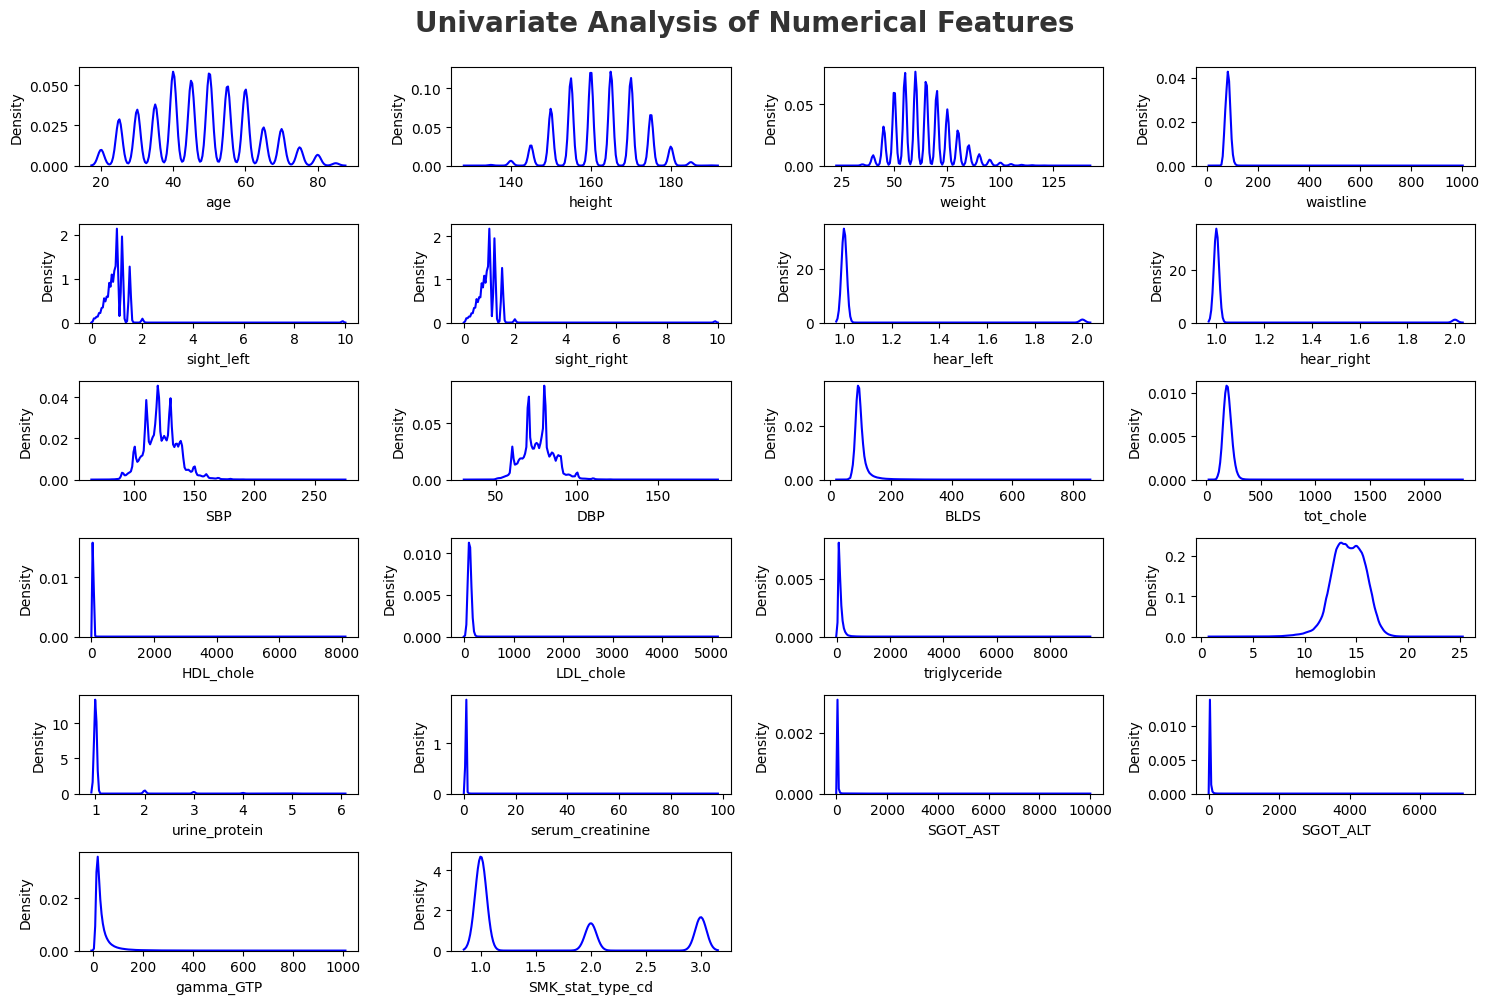

In [8]:
import math

n_cols = 4
n_rows = math.ceil(len(numeric_features) / n_cols)

plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(n_rows, n_cols, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()


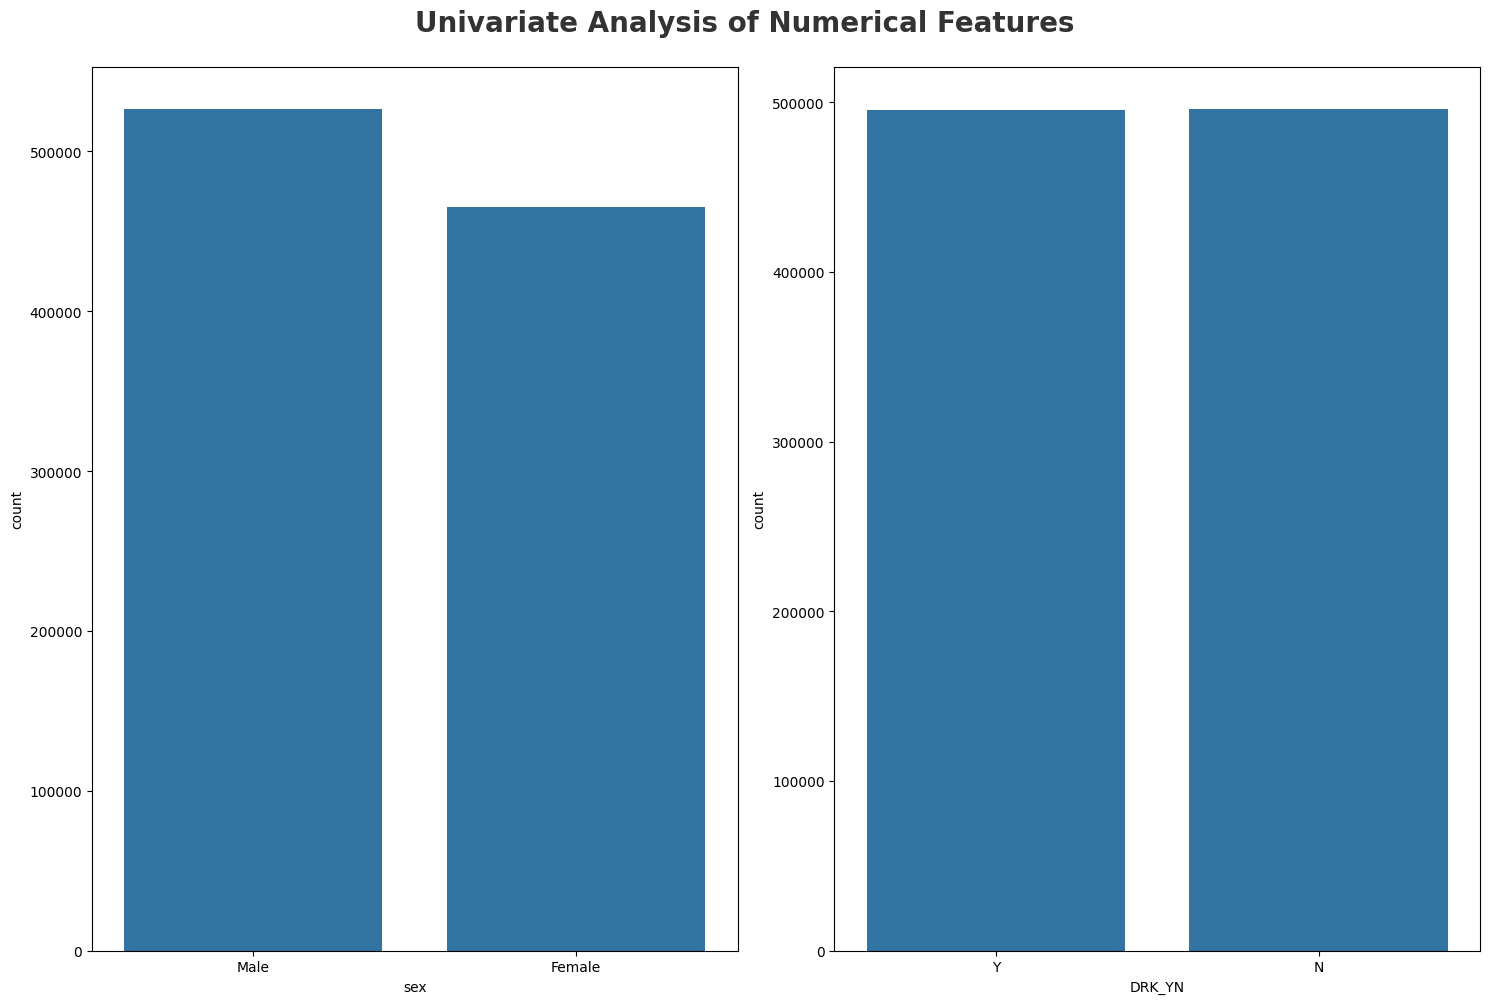

In [10]:
n_cols = 2
n_rows = math.ceil(len(categorical_features) / n_cols)

plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(n_rows, n_cols, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()


In [21]:
corr = df.corr()
corr['SMK_stat_type_cd']

sex                -0.642598
age                 0.073802
height             -0.491795
weight             -0.395614
waistline          -0.234447
sight_left         -0.063685
sight_right        -0.065000
hear_left           0.010414
hear_right          0.012682
SBP                -0.107369
DBP                -0.142998
BLDS               -0.100516
tot_chole          -0.007086
HDL_chole           0.167597
LDL_chole           0.011335
triglyceride       -0.208084
hemoglobin         -0.464186
urine_protein      -0.018797
serum_creatinine   -0.148009
SGOT_AST           -0.069315
SGOT_ALT           -0.139159
gamma_GTP          -0.239668
SMK_stat_type_cd    1.000000
DRK_YN             -0.362274
Name: SMK_stat_type_cd, dtype: float64

# Data Preprocessing and Feature Engineering

In [2]:
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [3]:
df.duplicated().sum()

26

In [4]:
df.drop_duplicates()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,N
991342,Male,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,N
991343,Female,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,Y
991344,Male,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,N


In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
df["sex"] = le.fit_transform(df["sex"])
df["DRK_YN"] = le.fit_transform(df["DRK_YN"])
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1
1,1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0
2,1,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0
3,1,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0
4,1,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,1,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,0
991342,1,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,0
991343,0,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,1
991344,1,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,0


In [6]:
for i in df.columns:
  df[i] = df[i].astype('float64')
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1.0,35.0,170.0,75.0,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1.0
1,1.0,30.0,180.0,80.0,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0.0
2,1.0,40.0,165.0,75.0,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0.0
3,1.0,50.0,175.0,80.0,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0.0
4,1.0,50.0,165.0,60.0,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,1.0,45.0,175.0,80.0,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,0.0
991342,1.0,35.0,170.0,75.0,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,0.0
991343,0.0,40.0,155.0,50.0,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,1.0
991344,1.0,25.0,175.0,60.0,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,0.0


In [7]:
df.loc[df["SMK_stat_type_cd"] == 3.0, "SMK_stat_type_cd"] = 0.0
df.loc[df["SMK_stat_type_cd"] == 2.0, "SMK_stat_type_cd"] = 0.0
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1.0,35.0,170.0,75.0,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1.0
1,1.0,30.0,180.0,80.0,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,0.0,0.0
2,1.0,40.0,165.0,75.0,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0.0
3,1.0,50.0,175.0,80.0,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0.0
4,1.0,50.0,165.0,60.0,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,1.0,45.0,175.0,80.0,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,0.0
991342,1.0,35.0,170.0,75.0,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,0.0
991343,0.0,40.0,155.0,50.0,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,0.0,1.0
991344,1.0,25.0,175.0,60.0,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,0.0


In [8]:
non_smokers = df[df['SMK_stat_type_cd'] == 1.0].shape[0]
smokers = df[df['SMK_stat_type_cd'] == 0.0].shape[0]

print(f"Non Smokers : {non_smokers}")
print(f"Smokers : {smokers}")

Non Smokers : 602441
Smokers : 388905


In [9]:
scaler = StandardScaler()
columns_to_be_scaled = ['age','height','weight','waistline','sight_left','sight_right','hear_left','hear_right',
                        'SBP','DBP','BLDS','tot_chole','HDL_chole','LDL_chole','triglyceride','hemoglobin','urine_protein',
                        'serum_creatinine','SGOT_AST','SGOT_ALT','gamma_GTP']
df[columns_to_be_scaled] = scaler.fit_transform(df[columns_to_be_scaled])
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1.0,-0.889514,0.835874,0.936210,0.739781,0.031629,0.035668,-0.180329,-0.177296,-0.167261,...,0.361643,-0.392788,1.810919,-0.21526,0.290374,-0.212371,0.351404,0.056791,1.0,1.0
1,1.0,-1.242090,1.913117,1.335755,0.655395,-0.133401,0.366370,-0.180329,-0.177296,0.520349,...,0.975435,-0.109022,0.990693,-0.21526,0.082270,-0.254936,0.389415,-0.201022,0.0,0.0
2,1.0,-0.536938,0.297252,0.936210,0.824167,0.361690,0.862423,-0.180329,-0.177296,-0.167261,...,-1.089136,-0.275368,0.990693,-0.21526,0.082270,0.894324,0.237373,0.612081,1.0,0.0
3,1.0,0.168215,1.374495,1.335755,0.824167,0.856782,0.366370,-0.180329,-0.177296,1.551763,...,-0.252148,-0.255798,2.126391,-0.21526,0.498477,0.128151,0.313394,-0.379508,1.0,0.0
4,1.0,0.168215,0.297252,-0.262425,-0.104078,0.031629,0.366370,-0.180329,-0.177296,1.070436,...,0.110547,-0.275368,-0.271194,-0.21526,-0.125833,-0.297501,-0.522835,-0.240685,1.0,0.0


In [14]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming 'SMK_stat_type_cd' is the target column and the rest are features
X = df.drop(columns=['SMK_stat_type_cd'])  # Features
y = df['SMK_stat_type_cd']  # Target

# Split the dataset into training and test sets (optional but recommended)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Lasso Regression with a regularization strength (alpha)
lasso = Lasso(alpha=0.005)  # Adjust alpha as necessary, smaller alpha means less regularization
lasso.fit(X_train, y_train)

# Get the coefficients of the features
lasso_coefficients = lasso.coef_

# Identify the selected features (non-zero coefficients)
selected_features = np.array(X_train.columns)[lasso_coefficients != 0]

print(f"Selected features: {list(selected_features)}")

# # Optionally: drop the features with zero coefficients from the original dataframe
# X_train_lasso = X_train[selected_features]
# X_test_lasso = X_test[selected_features]

# # Evaluate the model performance
# score = lasso.score(X_test_scaled, y_test)
# print(f"Lasso model accuracy with selected features: {score:.4f}")


Selected features: ['sex', 'age', 'height', 'SBP', 'BLDS', 'HDL_chole', 'triglyceride', 'hemoglobin', 'gamma_GTP', 'DRK_YN']
